<a href="https://colab.research.google.com/github/theheking/intro-to-python/blob/gh-pages/6_visualisation_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Visualisation with Seaborn and Matlib pyplot

Python has a number of powerful plotting libraries to choose from. One of the oldest and most popular is matplotlib

The Grammar of Graphics
1. Statistical graphics is a mapping from data to aesthetic attributes (colour, shape, size) of geometric objects (points, lines, bars)

2. Faceting can be used to generate the same plot for different subsets of the dataset


#Great resources include:
- chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf

- https://seaborn.pydata.org/examples/index.html

- https://www.python-graph-gallery.com/


In [ ]:
!pip install pandas matplotlib seaborn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import urllib.request

Basic steps of creating plots with Seaborn are:
1. Prepare some data
2. Control figure aesthetics 
3. Plot with seaborn
4. Further customize your plot

In [ ]:
# Introduction to plotting
# Create data
#initalise random state
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)


In [ ]:
print (x[:3])
print (y[:3])

[0.         0.02004008 0.04008016]
[[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788]
 [ 2.71414076  0.2488      0.87551913  2.6514917   2.01160156  0.47699563]
 [ 3.47517849  0.37047502  1.31938237  2.98516603  3.50568063  0.27183736]]


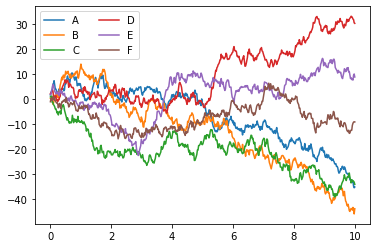

In [ ]:

# Plot the data with Matplotlib defaults
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');


Recreating that same plot from matplot.pyplot with seaborn!

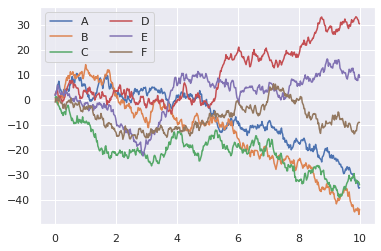

In [ ]:
sns.set()
# same plotting code as above!
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');


# Forming a Seaborn plot using our data
It provides high-level commands to create a variety of plot types.

Need to define
- data -> dataframe 
- x --> string with the name of column
- y --> string with the name of column
- hue 
- size


In [ ]:
#You can also get this URL value by right-clicking the `surveys.csv` link above and selecting "Copy Link Address"
url = 'https://monashdatafluency.github.io/python-workshop-base/modules/data/surveys.csv'
# url = 'https://goo.gl/9ZxqBg'  # or a shortened version to save typing
urllib.request.urlretrieve(url, 'surveys.csv')

survs_df = pd.read_csv('surveys.csv').dropna()


In [ ]:
#control figure aesthetics
sns.set_style("white")
#sns.set_style("whitegrid")
#sns.set_style("dark")

# other options include darkgrid, whitegrid, dark, white, ticks

In [ ]:
survs_df

,record_id,month,day,year,site_id,species_id,sex,hindfoot_length,weight
62,63,8,19,1977,3,DM,M,35.0,40.0
63,64,8,19,1977,7,DM,M,37.0,48.0
64,65,8,19,1977,4,DM,F,34.0,29.0
65,66,8,19,1977,4,DM,F,35.0,46.0
66,67,8,19,1977,7,DM,M,35.0,36.0
...,...,...,...,...,...,...,...,...,...
35540,35541,12,31,2002,15,PB,F,24.0,31.0
35541,35542,12,31,2002,15,PB,F,26.0,29.0
35542,35543,12,31,2002,15,PB,F,27.0,34.0
35546,35547,12,31,2002,10,RM,F,15.0,14.0


Another great extension for imporvement of aesthetics are: https://seaborn.pydata.org/tutorial/aesthetics.html

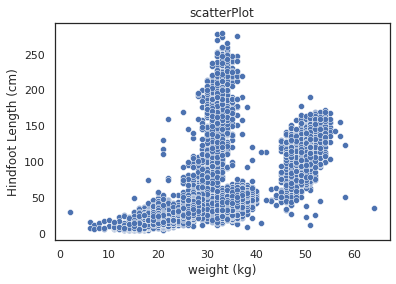

In [ ]:
##plot with scatter plot
g = sns.scatterplot(data=survs_df, y="weight", x="hindfoot_length")
#g = sns.scatterplot(data=survs_df, x="weight", y="hindfoot_length")

##add in other infomation such as title, axis labels, limits
plt.xlabel("weight (kg)")
plt.ylabel("Hindfoot Length (cm)")
plt.title ("scatterPlot")
#plt.xlim ((0,50))
plt.show(g)

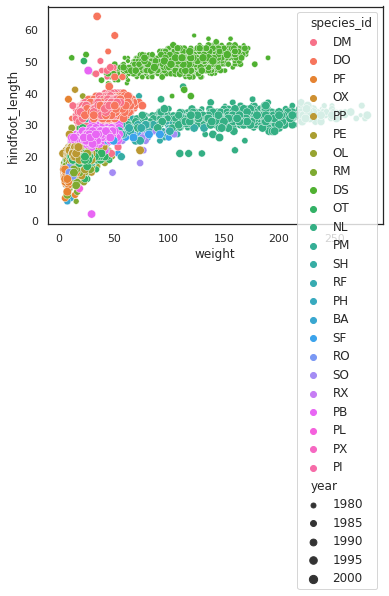

In [ ]:
# lets add some infomation about species and year using the hue and size 

ax = sns.scatterplot(data=survs_df, x="weight", y="hindfoot_length", size="year", hue="species_id")
#but as you can see this is a pretty ugly and uninformative plot

#Customising the legend

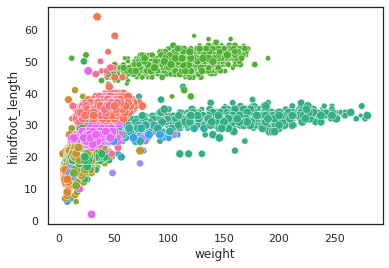

In [ ]:
#remove the legend
ax = sns.scatterplot(data=survs_df, x="weight", y="hindfoot_length", size="year", hue="species_id", legend=False)


You can also use the bbox_to_anchor() argument to place the legend outside of the plot. For example, you can use the following syntax to place the legend in the top right corner outside of the plot:


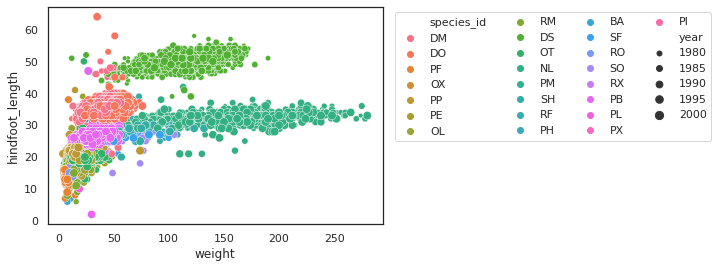

In [ ]:
g = sns.scatterplot(data=survs_df, x="weight", y="hindfoot_length", size="year", hue="species_id")
plt.legend(bbox_to_anchor=(1.02, 1), ncol=4, loc="upper left")
plt.show(g)

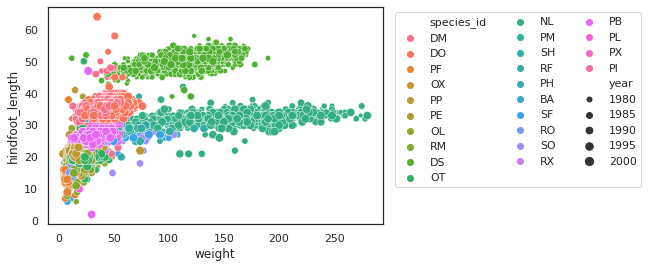

In [ ]:
#remove the key
g = sns.scatterplot(data=survs_df, x="weight", y="hindfoot_length", size="year", hue="species_id")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left",ncol=3)
plt.show(g)

# Change the colours using the Palette Function
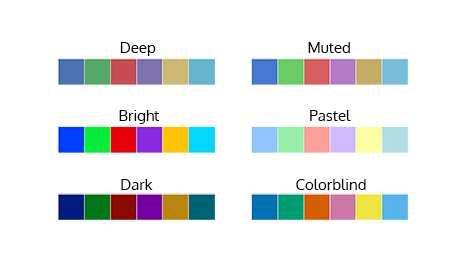

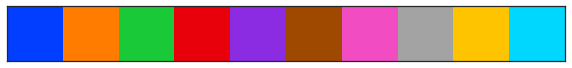

In [ ]:
##if you want to check them out
# Save a palette to a variable:
palette = sns.color_palette("bright")

# Use palplot and pass in the variable:
sns.palplot(palette)


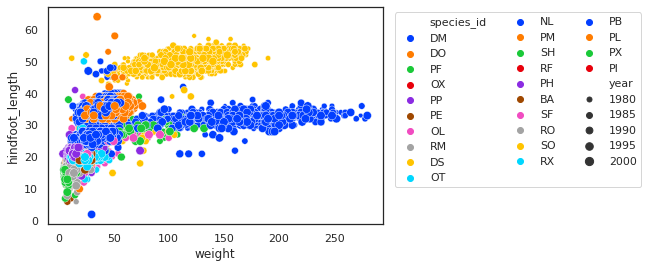

In [ ]:
##change the colours using palette arguement
g = sns.scatterplot(data=survs_df, x="weight", y="hindfoot_length", size="year", hue="species_id", palette="bright")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left",ncol=3)
plt.show(g)

# Forming a count bar plot
This is when we need to start asking questions about our data...

1. Is there a change in the number of observations we have per year?


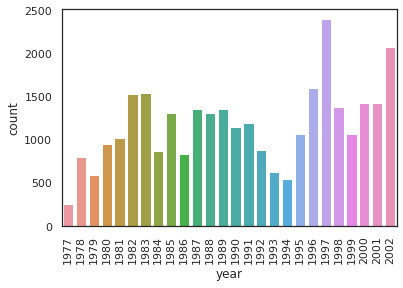

In [ ]:
g=sns.countplot(data=survs_df, x="year")
plt.xticks(rotation=90)
plt.show(g)

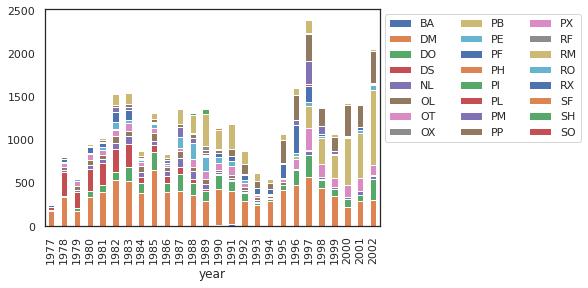

In [ ]:
survs_df[["year", "species_id"]].value_counts().unstack().plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1, 1), loc="upper left", ncol=3)

In [ ]:
#try to form a stacked id showing the distrubution of .....
g=sns.countplot(data=survs_df, x="year", hue="species_id")
plt.xticks(rotation=90)
plt.show(g)

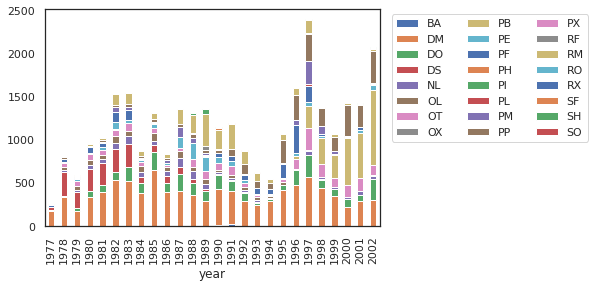

In [ ]:
#work around
g= survs_df[['year', 'species_id']].value_counts().unstack().plot(kind="bar", stacked=True)
plt.show(g)

In [ ]:
#work around
g= survs_df[['year', 'species_id']].value_counts().unstack().plot(kind="bar", stacked=True)
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left",ncol=3)
plt.show(g)

# Challenges
1) Produce a plot comparing the number of observations for each species at each site. 

- The plot should have site_id on the x axis, ideally as categorical data.

2) Create a boxplot of hindfoot_length across different species (species_id column) 

- HINT: There's a list of plot types available from the cheatsheet




# Boxplots are great for visualisation
We want to create a boxplot whcih shows the trend of weight over the years



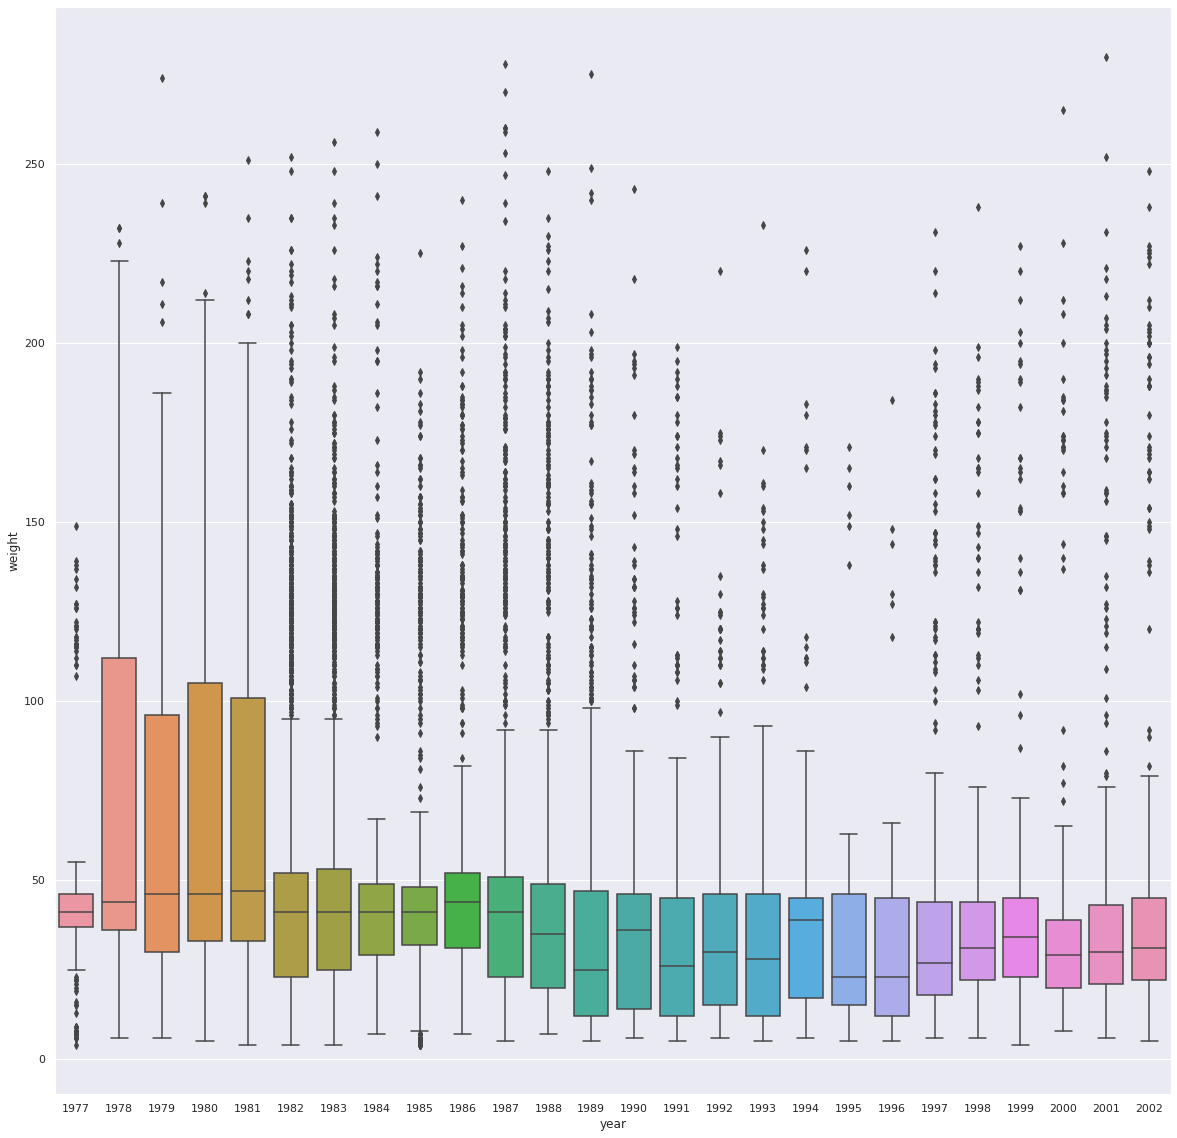

In [ ]:
sns.set(rc={'figure.figsize':(20,20)})
g = sns.boxplot(data=survs_df, x="year", y="weight")
#xticks
plt.show(g)



This is a really useful command if you have a datatype that is incorrect


In [ ]:
survs_df['year_fact'] = survs_df['year'].astype("category")


# Violin Plots are an alternative to boxplots...

- Boxplot has four main features about a variable: center, spread, asymmetry, and outlier

- Violin plot shows density too 

Here we will show extra things to develop your plot
- orientation
- increasing size of the figure
- split
- save an image for later

In [ ]:
sns.set(rc={'figure.figsize':(20.7,8.27)})


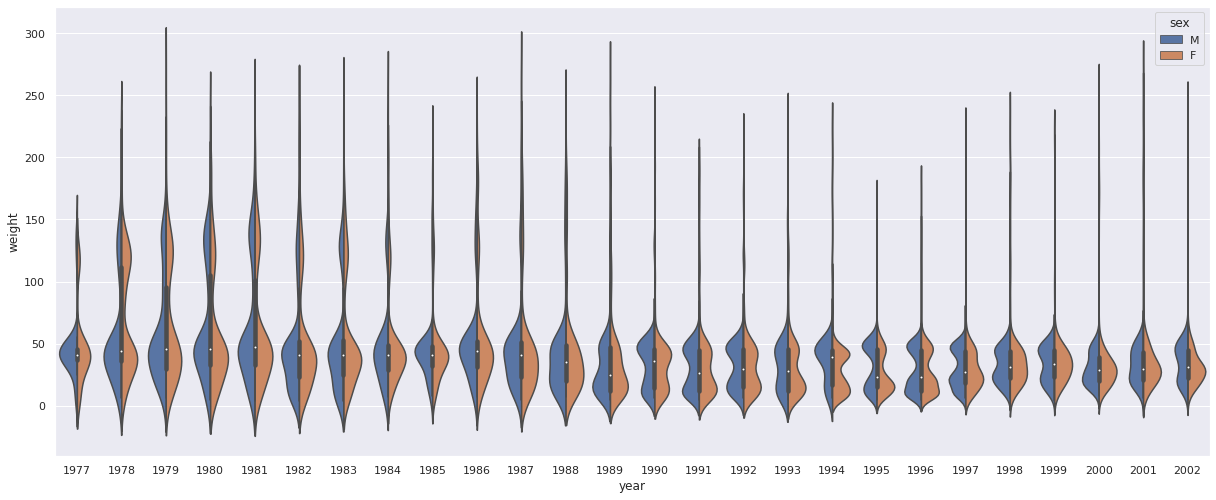

In [ ]:
g = sns.violinplot(data=survs_df, x="year", y="weight", split=True, orient="v", hue="sex")
# test out split=True, hue="sex"
#xticks
plt.show(g)




# Save an image 
When saving a figure think about


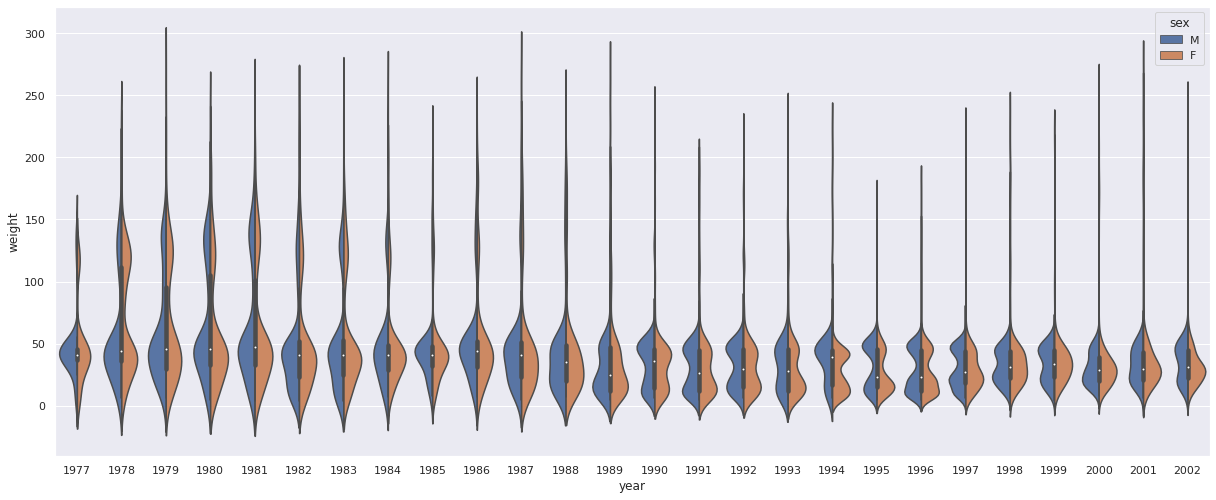

In [ ]:
g = sns.violinplot(data=survs_df, x="year", y="weight", split=True, orient="v", hue="sex")
location_string="nameofigure.jpeg"
plt.savefig(location_string, transparent =False)
#plt.clf()

# Challenge

- Can you log2 transform weight and plot a "normalised" boxplot ? Hint: use np.log2() function and name new column weight_log.

- Does a log2 transform make this data visualisation better ?




Let's see whether there is any correlation any of the variables! We'll do this using a pairgrid, which draws plots of all these correlations:

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:156: UserWarning: The handle <matplotlib.patches.Patch object at 0x7efc77067910> has a label of '_nolegend_' which cannot be automatically added to the legend.
  figlegend = self._figure.legend(handles, labels, **kwargs)


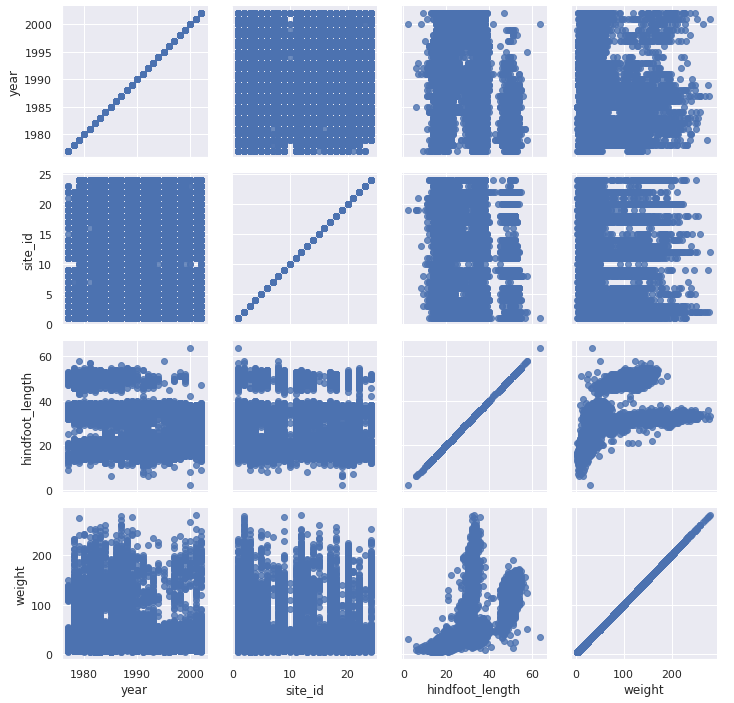

In [ ]:
g = sns.PairGrid(survs_df, vars=['year','site_id','hindfoot_length','weight'],
                 palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();
# NB. our data is not that useful